# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 3.5 MB 34.8 MB/s 
     |████████████████████████████████| 1.2 MB 38.0 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=fb4ee08fd5813dc1c8938596e66cf67d288b72ccbcf5f27d556d154db8d917de
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [5]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(remove_tag(sentence)))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [8]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding





In [9]:
def myfunction():
    mydata=newsgroups_train['data']
    mylist=[]
    for i in mydata:
        mylist.append(get_review_embedding(i))
    return mylist,newsgroups_train.target

In [11]:
X, y = myfunction()

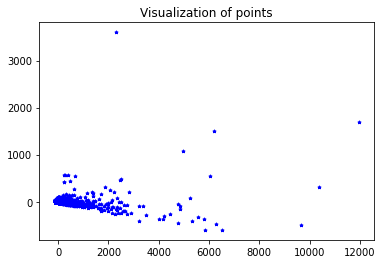

In [12]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
Xpca = pca.fit_transform(X)
plt.scatter(Xpca[:,:1], Xpca[:,1:2],label= "stars", color= "blue",marker= "*", s=10)

plt.title('Visualization of points')
plt.show()


# K_Means Algorithm


In [13]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4)
y_kmeans=kmeans.fit_predict(Xpca)


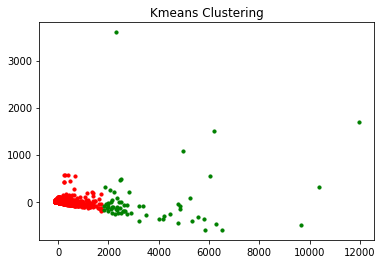

In [14]:
#code for visualisation of clusters
X2=np.array(Xpca)
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=10,c='red',label='Cluster 1')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=10,c='green',label='Cluster 2')
plt.title('Kmeans Clustering')
plt.show()



# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







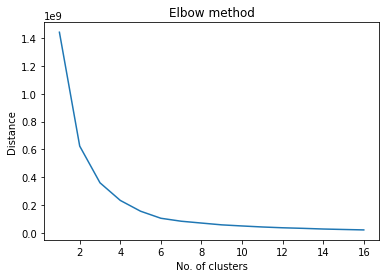

In [15]:
#elbow method
distance=[]
for i in range(1,17):
    kmeans=KMeans(n_clusters=i, random_state=4)
    kmeans.fit(Xpca)
    distance.append(kmeans.inertia_)
plt.plot(range(1,17),distance)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Distance')
plt.show()


To determine the optimal number of clusters, we have to select the value of k at the “elbow”, i.e., the point after which the distortion start decreasing in a linear fashion. By observing the above graph, '**5**' seems to be the optimal choice for the number of clusters.

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




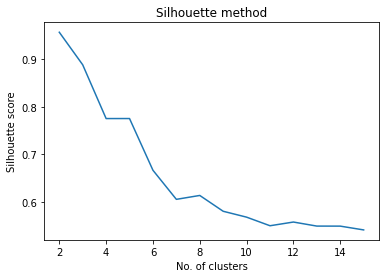

In [16]:
#silhouette method
from sklearn.metrics import silhouette_score
scores=[]
for i in range(2,16):
    kmeans=KMeans(n_clusters=i, random_state=4)
    y_kmeans=kmeans.fit_predict(Xpca)
    scores.append(silhouette_score(Xpca,y_kmeans))
    
plt.plot(range(2,16),scores)
plt.title('Silhouette method')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.show()

The highest silhouette score occurs at k=2. Thus, the optimal number of clusters is **2**.

# Agglomerative clustering

In [17]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

agg_c = AgglomerativeClustering()
y_agg_c=agg_c.fit_predict(Xpca)

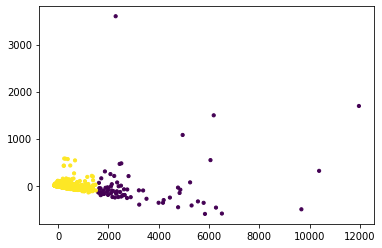

In [18]:
#code for visualisation of clusters
plt.scatter(Xpca[:,:1], Xpca[:,1:2],c=y_agg_c,s=10)
plt.show()

# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



**Agglomerative Clustering** is a bottom-up approach, initially, each data point is a cluster of its own, further pairs of clusters are merged as one moves up the hierarchy.

**Divisive Clustering** algorithm is a top-down clustering approach, initially, all the points in the dataset belong to one cluster and split is performed recursively as one moves down the hierarchy.

**Differences**



*   Divisive clustering is more complex as compared to agglomerative because it requires a flat clustering method to split each cluster until we have each data having its own singleton cluster.
*   Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves.
*   A divisive algorithm is also more accurate as it takes into consideration the global distribution of data when making top-level partitioning decisions.

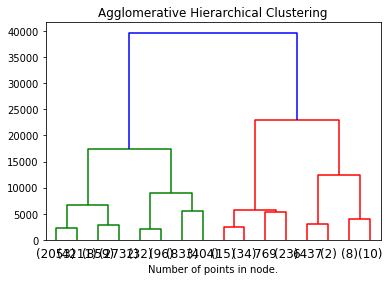

In [19]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
  
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters = None).fit(X)
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node.")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()

To find the optimal number of clusters from a dendogram, locate the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters. In this case, the answer is **2**.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


